In [212]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [213]:
# Carregar o dataset
df_salario = pd.read_csv('./datasets/dataset_salario.csv')

In [214]:
# Inspecionar a estrutura do dataframe
df_salario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempo_na_empresa  1000 non-null   int64  
 1   nivel_na_empresa  1000 non-null   int64  
 2   salario_em_reais  1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


In [215]:
# Copiar DF para DF EDA
df_salario_eda = df_salario.copy()

In [216]:
# Copiar DF para DF Bucketing
df_salario_bucketing = df_salario.copy()

### EDA

In [217]:
# Visualizar os dados 
df_salario_eda.head(10)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
0,50,1,2288.13
1,49,4,2389.84
2,39,10,2158.73
3,51,1,2341.06
4,62,7,3584.20
5,105,10,12102.18
6,80,3,5723.35
7,85,2,6424.92
8,66,5,3916.18
9,73,5,4751.79


In [218]:
# Detectar Valores ausentes
df_salario_eda.isnull().sum()

tempo_na_empresa    0
nivel_na_empresa    0
salario_em_reais    0
dtype: int64

In [219]:
# Medidas Estatísticas
df_salario_eda.describe()

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
count,1000.000000,1000.000000,1000.000000
mean,59.712000,5.467000,5093.726110
std,34.027679,2.889509,4536.168857
min,1.000000,1.000000,538.560000
25%,30.750000,3.000000,1537.477500
50%,60.000000,6.000000,3237.920000
75%,89.000000,8.000000,7436.680000
max,120.000000,10.000000,18923.230000


<Axes: xlabel='tempo_na_empresa'>

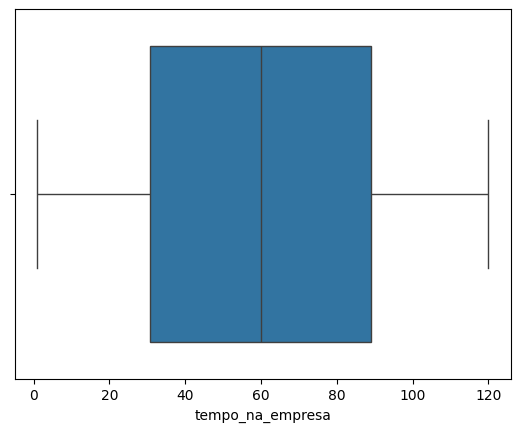

In [220]:
# Verificar / detectar outliers com boxplot
sns.boxplot(data=df_salario_eda, x='tempo_na_empresa')

<Axes: xlabel='nivel_na_empresa'>

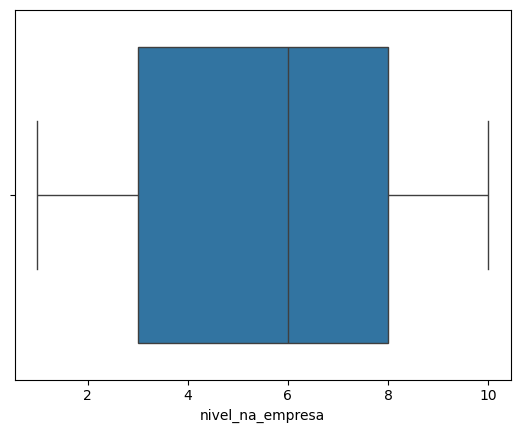

In [221]:
sns.boxplot(data=df_salario_eda, x='nivel_na_empresa')

<Axes: xlabel='salario_em_reais'>

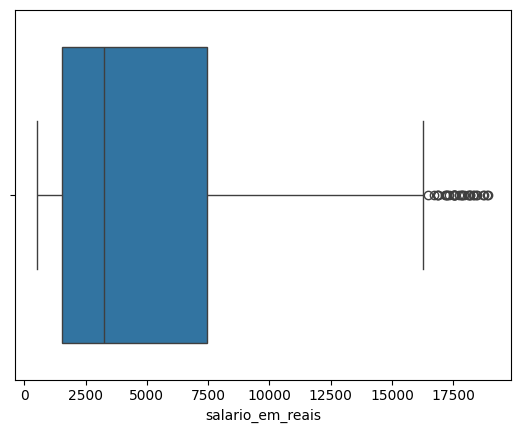

In [222]:
sns.boxplot(data=df_salario_eda, x='salario_em_reais')

<Axes: xlabel='tempo_na_empresa', ylabel='salario_em_reais'>

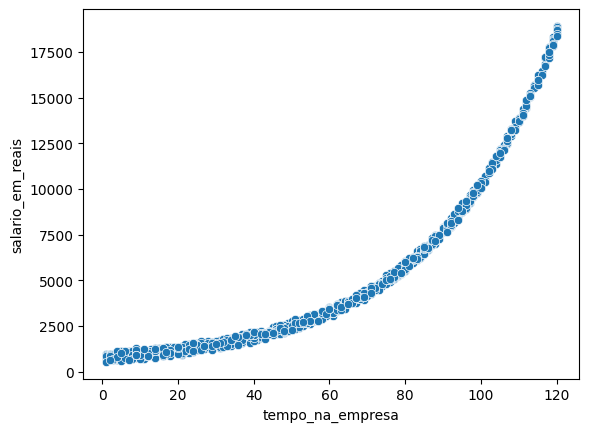

In [223]:
# Cruzamento de variáveisnuméricas com salario em reais (variavel dependente)
sns.scatterplot(data=df_salario_eda, x='tempo_na_empresa', y='salario_em_reais')

<Axes: xlabel='nivel_na_empresa', ylabel='salario_em_reais'>

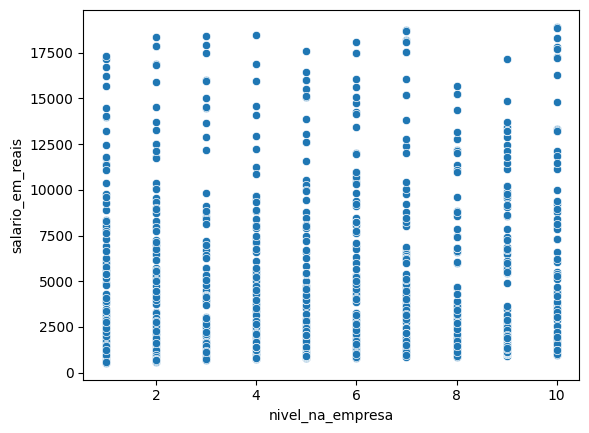

In [224]:
sns.scatterplot(data=df_salario_eda, x='nivel_na_empresa', y='salario_em_reais')

<Axes: xlabel='nivel_na_empresa', ylabel='tempo_na_empresa'>

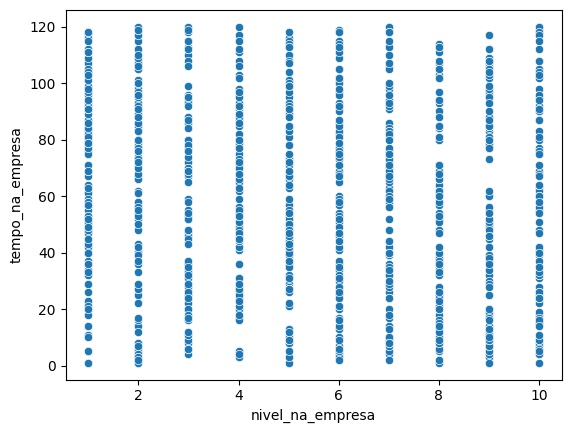

In [225]:
sns.scatterplot(data=df_salario_eda, x='nivel_na_empresa', y='tempo_na_empresa')

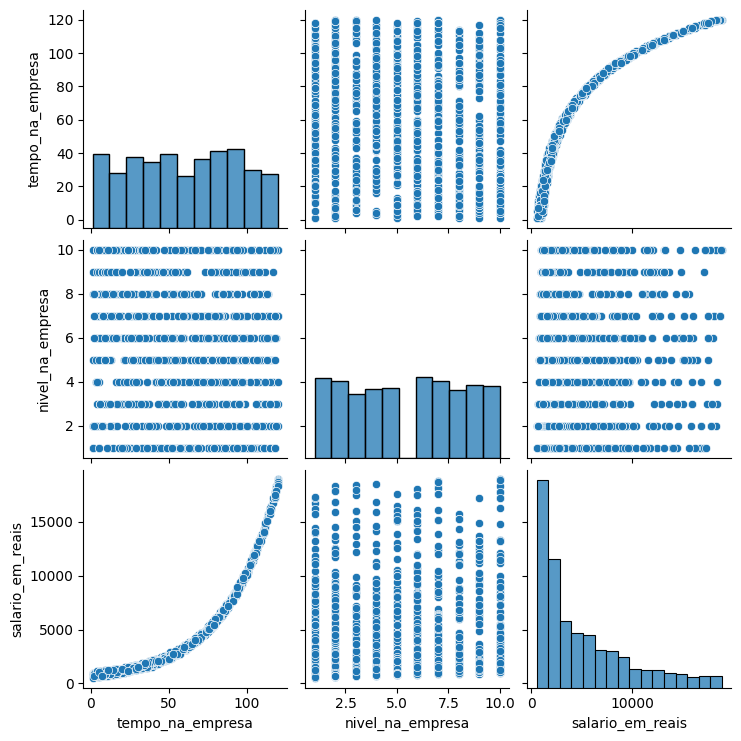

In [226]:
# Histograma das variáveis numéricas
sns.pairplot(df_salario_eda)

<Axes: >

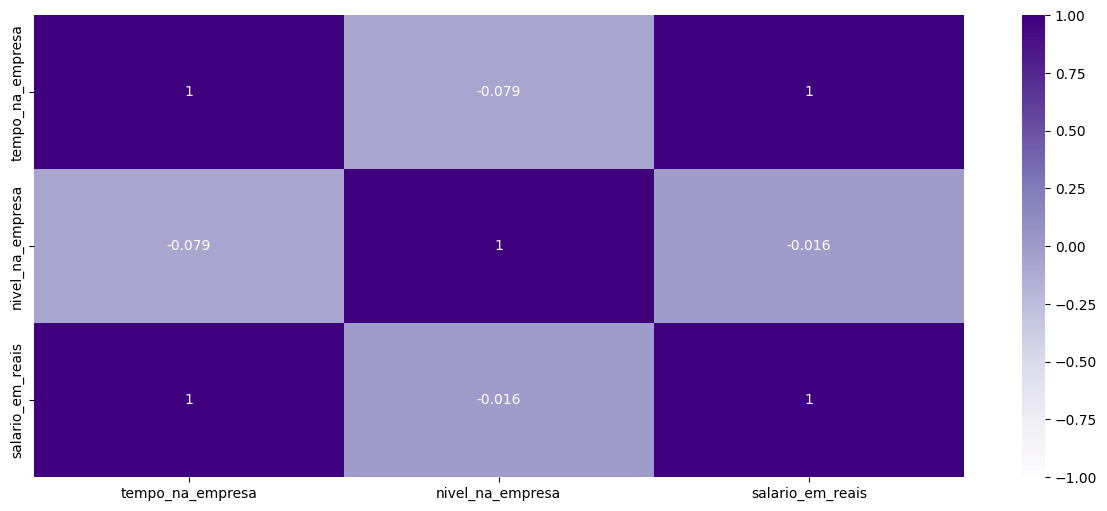

In [227]:
# Mapaa de Calor
plt.figure(figsize=(15,6))
sns.heatmap(df_salario_eda.corr('spearman'), annot=True, cmap='Purples', vmin=-1, vmax=1)

<Axes: >

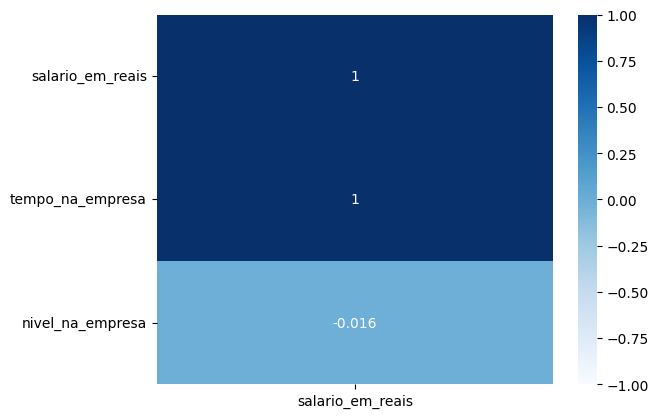

In [228]:
# Formato de Ranking
sns.heatmap(df_salario_eda.corr('spearman')[['salario_em_reais']].sort_values(by='salario_em_reais', ascending=False), annot=True, cmap='Blues', vmin=-1, vmax=1)

In [229]:
# Bucketing Tempo de Casa
bins_tempo_casa = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]
labels_tempo_casa = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119', '120-129']
df_salario_bucketing['escala_tempo'] = pd.cut(x=df_salario_bucketing['tempo_na_empresa'], bins=bins_tempo_casa,
                                               labels=labels_tempo_casa, include_lowest=True)

In [230]:
df_salario_bucketing.head(20)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais,escala_tempo
0,50,1,2288.13,40-49
1,49,4,2389.84,40-49
2,39,10,2158.73,30-39
3,51,1,2341.06,50-59
4,62,7,3584.20,60-69
5,105,10,12102.18,100-109
6,80,3,5723.35,70-79
7,85,2,6424.92,80-89
8,66,5,3916.18,60-69
9,73,5,4751.79,70-79


<Axes: xlabel='escala_tempo', ylabel='salario_em_reais'>

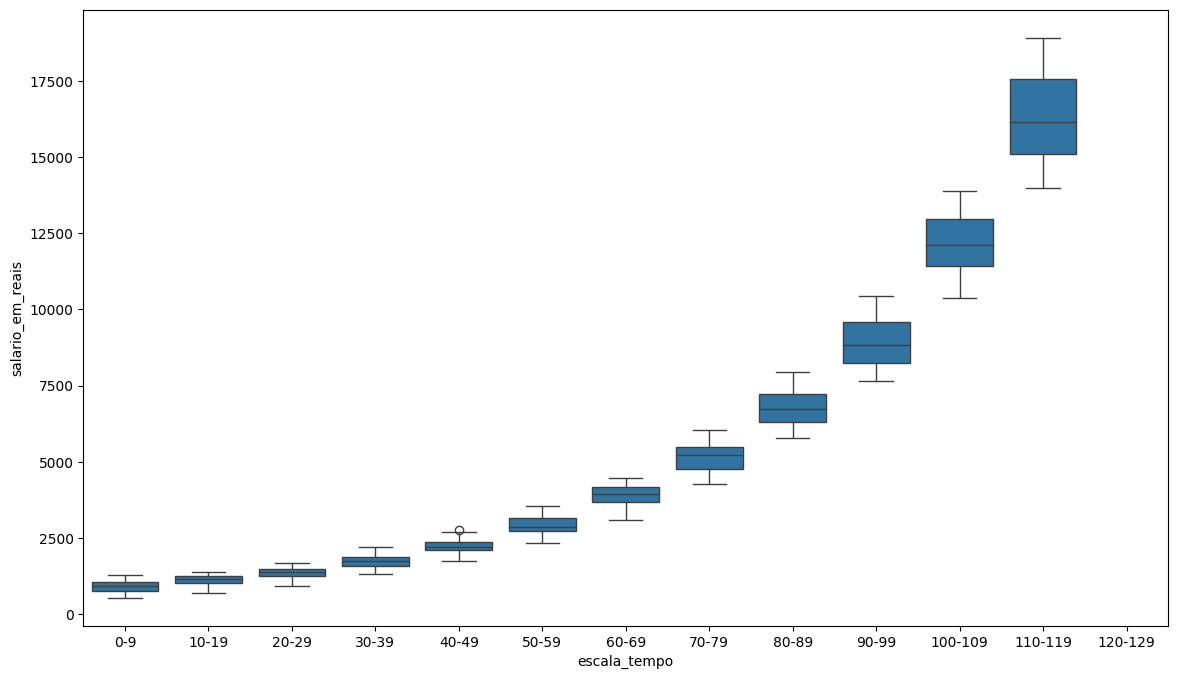

In [231]:
plt.figure(figsize=(14,8))
sns.boxplot(df_salario_bucketing, x='escala_tempo', y='salario_em_reais')

### Treinar Modelo Linear

In [232]:
# Importar Bibliotecas
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np

In [233]:
# Criar o Dataset de Treino e Teste
X = df_salario.drop(columns='salario_em_reais', axis=1)
y = df_salario['salario_em_reais']

In [234]:
# Split usando KFold com 3 folds
kf = KFold(n_splits=5, shuffle=True, random_state=51)

In [235]:
kf.split(X)

<generator object _BaseKFold.split at 0x000001D861F98F20>

In [236]:
# Bloco para Treinamento do Modelo

# Pipeline
# Padronizar variáveis numéricas - tempo_na_empresa, nivel_na_empresa

# Nomes das Colunas
colunas_numericas = ['tempo_na_empresa', 'nivel_na_empresa']

# Trasnformer para Colunas Numéricas
transformer_numericas = Pipeline(steps=[
    ('scaler', StandardScaler()),
])

# Criar um Column Transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', transformer_numericas, colunas_numericas)
])

# Criando o Pipeline principal = Pré-processamento + Treinamento
model_regr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())])

# Armazenar RMSE Treino e Teste
rmse_scores_fold_train = []
rmse_scores_fold_test = []

# Armazenar R2 Score de Teste
r2score_fold_test = []

# Armazenar Resíduos 
residuos = []

# Armazenar Predições
y_pred_total = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Treinar o modelo
    model_regr.fit(X_train, y_train)
    
    # Previsões
    y_pred_train = model_regr.predict(X_train)
    y_pred_test = model_regr.predict(X_test)
    
    # Calcular RMSE para Treino e Teste
    rmse_train = mean_squared_error(y_train, y_pred_train)
    rmse_test = mean_squared_error(y_test, y_pred_test)
   
    # Calcular R2 Score para Teste
    r2score_test = r2_score(y_test, y_pred_test)
    residuos_test = np.array(y_test - y_pred_test)

    # Armazeno as metricas da iteração na lista
    rmse_scores_fold_train.append(rmse_train)
    rmse_scores_fold_test.append(rmse_test)
    r2score_fold_test.append(r2score_test)
    residuos.append(residuos_test)
    
    # Armazenar Predições
    y_pred_total.append(y_pred_test)

rmse_train_final = np.mean(rmse_scores_fold_train)
rmse_test_final = np.mean(rmse_scores_fold_test)
r2score_test_final = np.mean(r2score_fold_test)
percentual_rmse_final = (rmse_test_final - rmse_train_final) / rmse_train_final
residuos = np.array(residuos).reshape(-1)
y_pred_total = np.array(y_pred_total).reshape(-1)

### Análise de Métricas - Modelo Linear

In [237]:
# Métricas
print(f'RMSE Treino: {rmse_train_final}')
print(f'RMSE Teste: {rmse_test_final}')
print(f'R2 Score Teste: {r2score_test_final}')
print(f'Percentual de Diferença entre RMSE Treino e Teste: {percentual_rmse_final}%')

RMSE Treino: 3546056.203836107
RMSE Teste: 3575856.679517252
R2 Score Teste: 0.8261178870584761
Percentual de Diferença entre RMSE Treino e Teste: 0.00840383625304831%


### Analise de Residuos - Modelo linear

In [238]:
# Transformar residuos na escala padrão
# (X - media) / desvio_padrao
from scipy.stats import zscore
residuos_std = zscore(residuos)

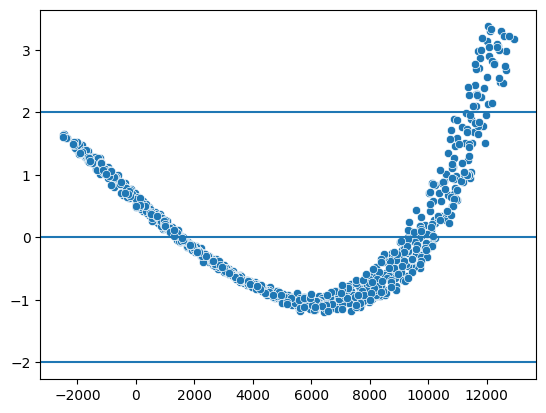

In [239]:
# Verificar linearidade dos resíduos: Valores entre -2 e +2 (Escala Padrão)
# Verificar homcedasticidade: Valores em torno da reta sem nenhuma tendência ou  formato
sns.scatterplot(x=y_pred_total, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)

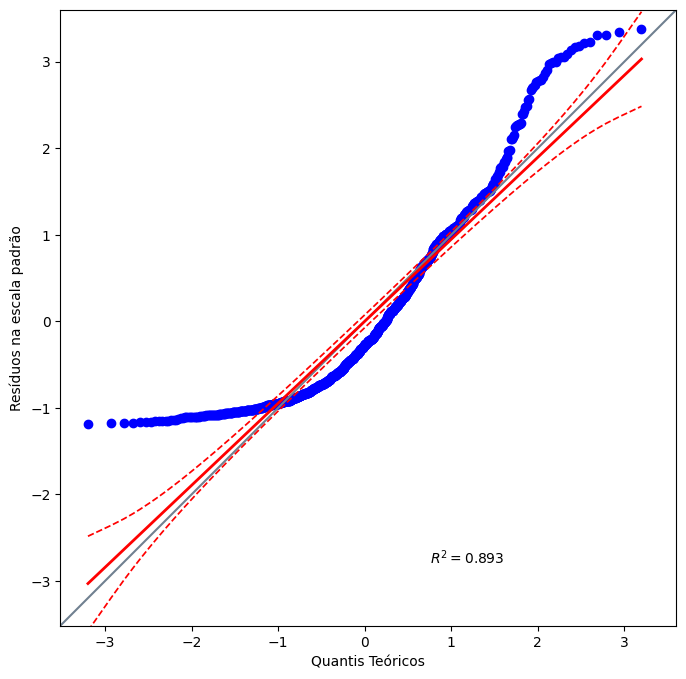

In [240]:
# Checar se residuos seguem uma distribuição normal
# QQ Plot
import pingouin as pg
plt.figure(figsize=(14,8))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')
plt.show()

In [241]:
# Teste de Normalidade - Shapiro-Wilk
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors
stat_shapiro, p_value_shapiro = shapiro(residuos)
print(f"Estat. Teste {stat_shapiro} e P-Value {p_value_shapiro}")

Estat. Teste 0.8919692179652284 e P-Value 7.013497918014399e-26


In [242]:
# Teste de Normalidade - Kolmogorov-Smirnov
stat_ks, p_value_ks = kstest(residuos, 'norm')
print(f"Estat. Teste {stat_ks} e P-Value {p_value_ks}")

Estat. Teste 0.5939999999999955 e P-Value 0.0


In [243]:
# Teste de Normalidade - Lilliefors
stat_ll, p_value_ll = lilliefors(residuos, dist='norm', pvalmethod='table')
print(f"Estat. Teste {stat_ll} e P-Value {p_value_ll}")

Estat. Teste 0.11825983774680088 e P-Value 0.0009999999999998899


### Treinar Modelo Polinomial

In [244]:
# Exemplo de Criação de Features Polinomiais
feat_poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = feat_poly.fit_transform(X)
feat_poly.feature_names_in_

array(['tempo_na_empresa', 'nivel_na_empresa'], dtype=object)

In [245]:
feat_poly.get_feature_names_out(feat_poly.feature_names_in_)

array(['tempo_na_empresa', 'nivel_na_empresa', 'tempo_na_empresa^2',
       'tempo_na_empresa nivel_na_empresa', 'nivel_na_empresa^2',
       'tempo_na_empresa^3', 'tempo_na_empresa^2 nivel_na_empresa',
       'tempo_na_empresa nivel_na_empresa^2', 'nivel_na_empresa^3'],
      dtype=object)

In [246]:
# Bloco para Treinamento do Modelo
graus_polynomial = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

rmse_train_values = []
rmse_test_values = []
percentual_rmse_values = []
r2score_test_values = []

# Split usando KFold com 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=51)

for grau in graus_polynomial:
    # Criar Features Polinomiais
    feat_poly = PolynomialFeatures(degree=grau, include_bias=False)
    X_poly = feat_poly.fit_transform(X)
    
    # Criar o Dataset de Treino e Teste
    X_poly_df = pd.DataFrame(X_poly, columns=feat_poly.get_feature_names_out(X.columns))
    
    # Nomes das Colunas
    colunas_numericas = X_poly_df.columns.tolist()

    # Transformer para Colunas Numéricas
    transformer_numericas = Pipeline(steps=[
        ('scaler', StandardScaler()),
    ])

    # Criar um Column Transformer
    preprocessor = ColumnTransformer(transformers=[
        ('num', transformer_numericas, colunas_numericas)
    ])

    # Criando o Pipeline principal
    model_regr = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())])

    # Armazenar métricas
    rmse_scores_fold_train = []
    rmse_scores_fold_test = []
    r2score_fold_test = []
    residuos = []
    y_pred_total = []

    for train_index, test_index in kf.split(X_poly_df):
        X_train, X_test = X_poly_df.iloc[train_index], X_poly_df.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Treinar o modelo
        model_regr.fit(X_train, y_train)
        
        # Previsões
        y_pred_train = model_regr.predict(X_train)
        y_pred_test = model_regr.predict(X_test)
        
        # Calcular métricas
        rmse_train = mean_squared_error(y_train, y_pred_train)
        rmse_test = mean_squared_error(y_test, y_pred_test)
        r2score_test = r2_score(y_test, y_pred_test)
        residuos_test = np.array(y_test - y_pred_test)

        # Armazenar métricas
        rmse_scores_fold_train.append(rmse_train)
        rmse_scores_fold_test.append(rmse_test)
        r2score_fold_test.append(r2score_test)
        residuos.append(residuos_test)
        y_pred_total.append(y_pred_test)

    # Calcular médias finais
    rmse_train_final = np.mean(rmse_scores_fold_train)
    rmse_test_final = np.mean(rmse_scores_fold_test)
    r2score_test_final = np.mean(r2score_fold_test)
    percentual_rmse_final = (rmse_test_final - rmse_train_final) / rmse_train_final

    # Armazenar valores para o plot
    rmse_train_values.append(rmse_train_final)
    rmse_test_values.append(rmse_test_final)
    r2score_test_values.append(r2score_test_final)
    percentual_rmse_values.append(percentual_rmse_final)

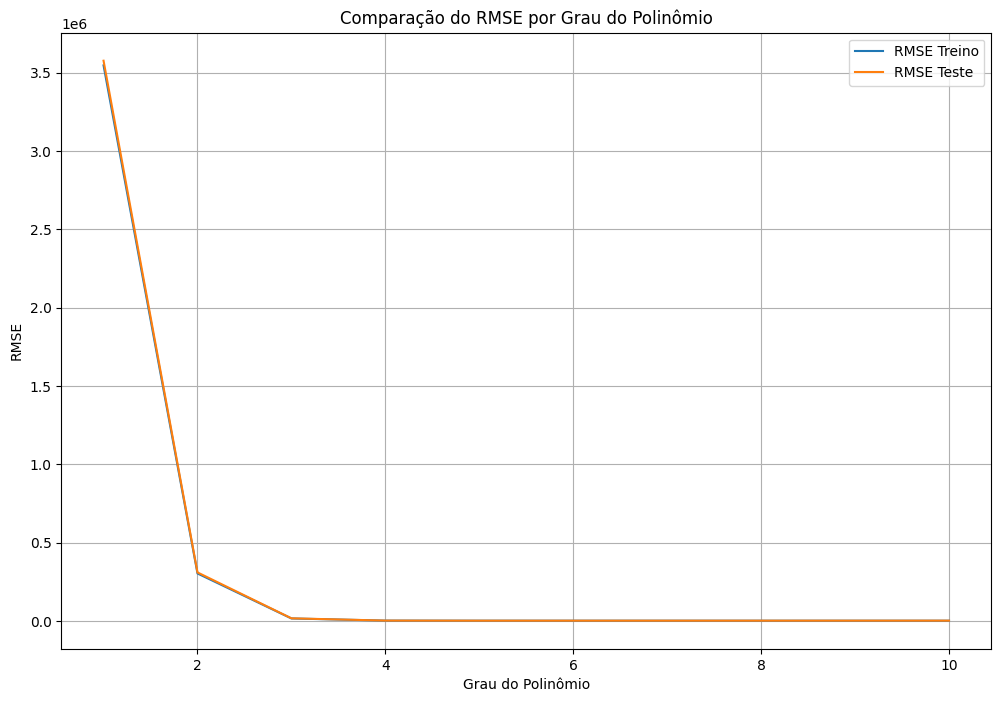

In [247]:
# Plotar Gráfico para comparar RMSE por grau polinomial
plt.figure(figsize=(12,8))
plt.plot(graus_polynomial, rmse_train_values, label='RMSE Treino')
plt.plot(graus_polynomial, rmse_test_values, label='RMSE Teste')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.title('Comparação do RMSE por Grau do Polinômio')
plt.legend()
plt.grid(True)
plt.show()

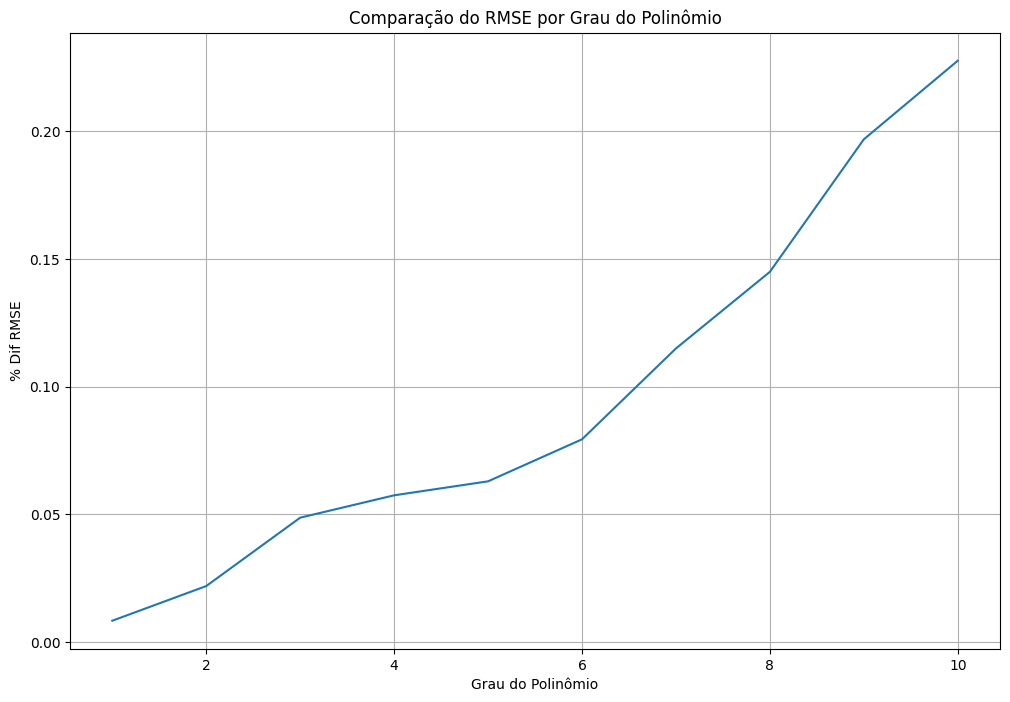

In [248]:
# Plotar Gráfico para comparar %Dif RMSE (Treino e Teste)
plt.figure(figsize=(12,8))
plt.plot(graus_polynomial, percentual_rmse_values, label='% Dif RMSE Treino e Teste')
plt.xlabel('Grau do Polinômio')
plt.ylabel('% Dif RMSE')
plt.title('Comparação do RMSE por Grau do Polinômio')
plt.grid(True)
plt.show()

### Análise de Métricas - Modelo Polinomial

In [249]:
# Métricas
print(f'RMSE Treino: {rmse_train_final}')
print(f'RMSE Teste: {rmse_test_final}')
print(f'R2 Score Teste: {r2score_test_final}')
print(f'Percentual de Diferença entre RMSE Treino e Teste: {percentual_rmse_final}%')

RMSE Treino: 2172.479089398489
RMSE Teste: 2666.895498152997
R2 Score Teste: 0.999868770172774
Percentual de Diferença entre RMSE Treino e Teste: 0.2275816651894222%


Análise de Resíduos - Modelo Polinomial

In [250]:
# Transformar residuos na escala padrão
# (X - media) / desvio_padrao
from scipy.stats import zscore
residuos_std = zscore(residuos)

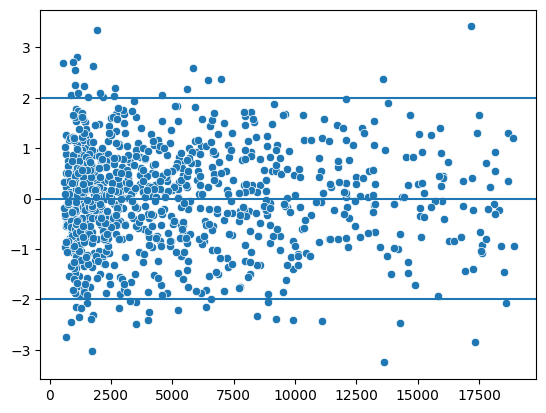

In [251]:
residuos = np.array(residuos).reshape(-1)  # Flatten o array de resíduos
y_pred_total = np.array(y_pred_total).reshape(-1)  # Flatten o array de predições

# Então continue com a análise de resíduos:
residuos_std = zscore(residuos)

# Verificar linearidade dos resíduos: Valores entre -2 e +2 (Escala Padrão)
# Verificar homcedasticidade: Valores em torno da reta sem nenhuma tendência ou  formato
sns.scatterplot(x=y_pred_total, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)

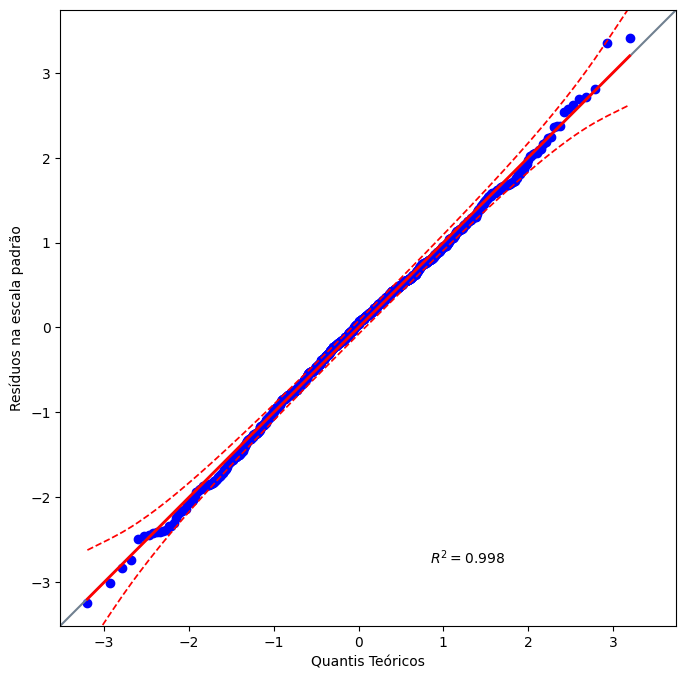

In [252]:
# Chcear se residuos seguem uma distribuição normal
# QQ Plot
import pingouin as pg
plt.figure(figsize=(14,8))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')
plt.show()

In [253]:
# Teste de Normalidade - Shapiro-Wilk
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors
stat_shapiro, p_value_shapiro = shapiro(residuos)
print(f"Estat. Teste {stat_shapiro} e P-Value {p_value_shapiro}")

Estat. Teste 0.9978748324703347 e P-Value 0.23411394061959506


In [254]:
# Teste de Normalidade - Kolmogorov-Smirnov
stat_ks, p_value_ks = kstest(residuos, 'norm')
print(f"Estat. Teste {stat_ks} e P-Value {p_value_ks}")

Estat. Teste 0.4974313100665533 e P-Value 3.6557614889306336e-229


In [255]:
# Teste de Normalidade - Lilliefors
stat_ll, p_value_ll = lilliefors(residuos, dist='norm', pvalmethod='table')
print(f"Estat. Teste {stat_ll} e P-Value {p_value_ll}")

Estat. Teste 0.025625583379863537 e P-Value 0.16485044141599048
